In [1]:
#Random Forest Regressor model
import pandas as pd
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#For spliting training set and feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

data_sleep = pd.DataFrame()
data_act = pd.DataFrame()

In [2]:
#oura file with sleep data
data_sleep = pd.read_csv('T_raw_oura_sleep_copy.csv')
print(data_sleep.columns)

Index(['summary_date', 'period_id', 'is_longest', 'timezone',
       'bedtime_end_dt_adjusted', 'bedtime_start_dt_adjusted',
       'breath_average', 'duration_in_hrs', 'total_in_hrs', 'awake_in_hrs',
       'rem_in_hrs', 'deep_in_hrs', 'light_in_hrs', 'midpoint_time',
       'efficiency', 'restless', 'onset_latency_in_hrs', 'hr_5min',
       'hr_average', 'hr_lowest', 'hypnogram_5min', 'rmssd', 'rmssd_5min',
       'score', 'score_alignment', 'score_deep', 'score_disturbances',
       'score_efficiency', 'score_latency', 'score_rem', 'score_total',
       'temperature_deviation', 'temperature_trend_deviation',
       'bedtime_start_delta', 'bedtime_end_delta', 'midpoint_at_delta',
       'temperature_delta'],
      dtype='object')


In [3]:
data_sleep.head()

,summary_date,period_id,is_longest,timezone,bedtime_end_dt_adjusted,bedtime_start_dt_adjusted,breath_average,duration_in_hrs,total_in_hrs,awake_in_hrs,...,score_efficiency,score_latency,score_rem,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta
0,2022-07-17,0,1,60,2022-07-18 07:25:59+01:00,2022-07-17 21:02:59+01:00,17.500,10.383333,8.933333,1.450000,...,86,99,96,100,0.02,-0.02,-10621,26759,9269,0.02
1,2022-07-18,0,1,60,2022-07-19 07:24:54+01:00,2022-07-18 22:16:54+01:00,17.125,9.133333,8.483333,0.650000,...,98,75,98,98,-0.10,-0.03,-6186,26694,9804,-0.10
2,2022-07-19,0,1,60,2022-07-20 06:51:30+01:00,2022-07-19 22:28:30+01:00,17.375,8.383333,7.575000,0.808333,...,95,97,80,91,-0.36,-0.19,-5490,24690,9900,-0.36
3,2022-07-20,1,1,60,2022-07-21 07:26:21+01:00,2022-07-20 22:22:21+01:00,17.125,9.066667,8.500000,0.566667,...,99,72,88,98,-0.25,-0.29,-5859,26781,10101,-0.25
4,2022-07-21,1,1,60,2022-07-22 07:22:51+01:00,2022-07-21 22:01:51+01:00,16.875,9.350000,8.400000,0.950000,...,95,56,94,97,-0.07,-0.23,-7089,26571,10161,-0.07


In [4]:
#oura file with activity data
data_acti = pd.read_csv('T_raw_oura_activity copy.csv')
print(data_acti.columns)

Index(['summary_date', 'timezone', 'day_start_dt_adjusted',
       'day_end_dt_adjusted', 'cal_active', 'cal_total', 'class_5min', 'steps',
       'daily_movement', 'non_wear', 'rest', 'inactive', 'low', 'medium',
       'high', 'inactivity_alerts', 'average_met', 'met_1min',
       'met_min_inactive', 'met_min_low', 'met_min_medium', 'met_min_high',
       'target_calories', 'target_km', 'target_miles', 'to_target_km',
       'to_target_miles', 'score', 'score_meet_daily_targets',
       'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
       'score_training_frequency', 'score_training_volume', 'rest_mode_state',
       'total'],
      dtype='object')


In [5]:
steps = data_acti["steps"]
steps.head()


0     7142
1     5021
2     9068
3     8618
4    18070
Name: steps, dtype: int64

In [6]:
met = data_acti["average_met"]
met.head()

0    1.34375
1    1.31250
2    1.40625
3    2.50000
4    2.03125
Name: average_met, dtype: float64

In [7]:
data_sleep.insert(37,"steps",steps,False)
data_sleep.head()

,summary_date,period_id,is_longest,timezone,bedtime_end_dt_adjusted,bedtime_start_dt_adjusted,breath_average,duration_in_hrs,total_in_hrs,awake_in_hrs,...,score_latency,score_rem,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta,steps
0,2022-07-17,0,1,60,2022-07-18 07:25:59+01:00,2022-07-17 21:02:59+01:00,17.500,10.383333,8.933333,1.450000,...,99,96,100,0.02,-0.02,-10621,26759,9269,0.02,7142
1,2022-07-18,0,1,60,2022-07-19 07:24:54+01:00,2022-07-18 22:16:54+01:00,17.125,9.133333,8.483333,0.650000,...,75,98,98,-0.10,-0.03,-6186,26694,9804,-0.10,5021
2,2022-07-19,0,1,60,2022-07-20 06:51:30+01:00,2022-07-19 22:28:30+01:00,17.375,8.383333,7.575000,0.808333,...,97,80,91,-0.36,-0.19,-5490,24690,9900,-0.36,9068
3,2022-07-20,1,1,60,2022-07-21 07:26:21+01:00,2022-07-20 22:22:21+01:00,17.125,9.066667,8.500000,0.566667,...,72,88,98,-0.25,-0.29,-5859,26781,10101,-0.25,8618
4,2022-07-21,1,1,60,2022-07-22 07:22:51+01:00,2022-07-21 22:01:51+01:00,16.875,9.350000,8.400000,0.950000,...,56,94,97,-0.07,-0.23,-7089,26571,10161,-0.07,18070


In [8]:
data_sleep.insert(38,"met",met,False)
data_sleep.head()

,summary_date,period_id,is_longest,timezone,bedtime_end_dt_adjusted,bedtime_start_dt_adjusted,breath_average,duration_in_hrs,total_in_hrs,awake_in_hrs,...,score_rem,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta,steps,met
0,2022-07-17,0,1,60,2022-07-18 07:25:59+01:00,2022-07-17 21:02:59+01:00,17.500,10.383333,8.933333,1.450000,...,96,100,0.02,-0.02,-10621,26759,9269,0.02,7142,1.34375
1,2022-07-18,0,1,60,2022-07-19 07:24:54+01:00,2022-07-18 22:16:54+01:00,17.125,9.133333,8.483333,0.650000,...,98,98,-0.10,-0.03,-6186,26694,9804,-0.10,5021,1.31250
2,2022-07-19,0,1,60,2022-07-20 06:51:30+01:00,2022-07-19 22:28:30+01:00,17.375,8.383333,7.575000,0.808333,...,80,91,-0.36,-0.19,-5490,24690,9900,-0.36,9068,1.40625
3,2022-07-20,1,1,60,2022-07-21 07:26:21+01:00,2022-07-20 22:22:21+01:00,17.125,9.066667,8.500000,0.566667,...,88,98,-0.25,-0.29,-5859,26781,10101,-0.25,8618,2.50000
4,2022-07-21,1,1,60,2022-07-22 07:22:51+01:00,2022-07-21 22:01:51+01:00,16.875,9.350000,8.400000,0.950000,...,94,97,-0.07,-0.23,-7089,26571,10161,-0.07,18070,2.03125


In [9]:
#deleting the columns not required

del data_sleep['period_id']
del data_sleep['timezone']
#del data_sleep['bedtime_end_dt_adjusted']
#del data_sleep['bedtime_start_dt_adjusted']
del data_sleep['efficiency']
del data_sleep['onset_latency_in_hrs']
del data_sleep['hr_5min']
del data_sleep['hypnogram_5min']
del data_sleep['rmssd_5min']
del data_sleep['score']
del data_sleep['score_alignment']
del data_sleep['score_deep']
del data_sleep['score_disturbances']
del data_sleep['score_efficiency']
del data_sleep['score_latency']
del data_sleep['score_rem']
del data_sleep['score_total']
del data_sleep['temperature_deviation']
del data_sleep['temperature_trend_deviation']
del data_sleep['bedtime_start_delta']
del data_sleep['bedtime_end_delta']
del data_sleep['midpoint_at_delta']
del data_sleep['temperature_delta']
del data_sleep['awake_in_hrs']
del data_sleep['rem_in_hrs']
del data_sleep['deep_in_hrs']
del data_sleep['light_in_hrs']
# removing duration in hours and midpoint time
del data_sleep['duration_in_hrs']
del data_sleep['midpoint_time']
# removing summary date
del data_sleep['summary_date']
# removing is_longest 
del data_sleep['is_longest']
# removing rmssd 
del data_sleep['rmssd']
# removing hr_lowest 
del data_sleep['hr_lowest']
# removing breath_average
del data_sleep['breath_average']
# removing breath_average
del data_sleep['hr_average']

print(data_sleep.columns)

Index(['bedtime_end_dt_adjusted', 'bedtime_start_dt_adjusted', 'total_in_hrs',
       'restless', 'steps', 'met'],
      dtype='object')


In [10]:
#Descriptive statistics for each column
data_sleep.describe()

,total_in_hrs,restless,steps,met
count,23.000000,23.000000,23.000000,23.000000
mean,8.249638,14.695652,9993.913043,1.649457
std,0.506246,2.583774,5967.368987,0.371904
min,7.275000,10.000000,2198.000000,1.187500
25%,7.925000,13.000000,6542.500000,1.359375
50%,8.383333,14.000000,8618.000000,1.500000
75%,8.529167,17.000000,11096.500000,1.843750
max,9.100000,19.000000,25669.000000,2.531250


In [11]:
print(data_sleep.dtypes)

bedtime_end_dt_adjusted       object
bedtime_start_dt_adjusted     object
total_in_hrs                 float64
restless                       int64
steps                          int64
met                          float64
dtype: object


In [12]:
#Formatting date column to float to work with regression model
#data_sleep['summary_date'] = data_sleep['summary_date'].astype('datetime64').astype(int).astype(float)
data_sleep['bedtime_end_dt_adjusted'] = data_sleep['bedtime_end_dt_adjusted'].astype('datetime64').astype(int).astype(float)
data_sleep['bedtime_start_dt_adjusted'] = data_sleep['bedtime_start_dt_adjusted'].astype('datetime64').astype(int).astype(float)
print(data_sleep.dtypes)

bedtime_end_dt_adjusted      float64
bedtime_start_dt_adjusted    float64
total_in_hrs                 float64
restless                       int64
steps                          int64
met                          float64
dtype: object


In [13]:
#Removing the unamed col
data_sleep = data_sleep.loc[:, ~data_sleep.columns.str.contains('^Unnamed')]
data_sleep.head()

,bedtime_end_dt_adjusted,bedtime_start_dt_adjusted,total_in_hrs,restless,steps,met
0,1.658126e+18,1.658088e+18,8.933333,15,7142,1.34375
1,1.658212e+18,1.658179e+18,8.483333,15,5021,1.31250
2,1.658296e+18,1.658266e+18,7.575000,19,9068,1.40625
3,1.658385e+18,1.658352e+18,8.500000,14,8618,2.50000
4,1.658471e+18,1.658437e+18,8.400000,18,18070,2.03125


In [14]:
#Features and Targets and Convert Data to Arrays
# Labels are the values we want to predict
# Use numpy to convert to arrays
import numpy as np
labels = np.array(data_sleep['total_in_hrs'])

# Remove the labels from the features
# axis 1 refers to the columns
data_sleep= data_sleep.drop('total_in_hrs', axis = 1)

# Saving feature names for later use
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
feature_list = list(data_sleep.columns)

# Convert to numpy array
data_sleep = np.array(data_sleep)
print(feature_list)

['bedtime_end_dt_adjusted', 'bedtime_start_dt_adjusted', 'restless', 'steps', 'met']


In [15]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(data_sleep, labels, test_size = 0.25, random_state = 42)

In [16]:
#testing if training and split is done correctly
#expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17, 5)
Training Labels Shape: (17,)
Testing Features Shape: (6, 5)
Testing Labels Shape: (6,)


In [17]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'hours.')
#Mean Absolute Error: 0.45 hours.

Mean Absolute Error: 0.45 hours.


In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 94.89 %.

Accuracy: 94.89 %.


In [22]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: restless             Importance: 0.33
Variable: met                  Importance: 0.3
Variable: steps                Importance: 0.2
Variable: bedtime_start_dt_adjusted Importance: 0.09
Variable: bedtime_end_dt_adjusted Importance: 0.08


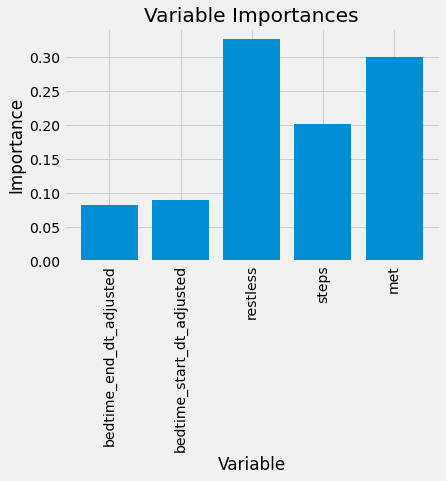

In [23]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');